In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.pipeline import Pipeline


from ipywidgets import interact
import ipywidgets as widgets

import seaborn as sns

In [3]:
data=pd.read_csv("mall.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
#deleting duplicates
print('Size of dataframe before drop_duplicates', data.shape)

data.drop_duplicates(inplace= True)

print('Size of dataframe after drop_duplicates', data.shape)

Size of dataframe before drop_duplicates (200, 5)
Size of dataframe after drop_duplicates (200, 5)


In [8]:
#Seprating out the categorical and continuous variables
def seperate_data_types(data):
    categorical=[]
    continuous=[]
    for column in data.columns:
        if data[column].nunique () < 100:
            categorical.append(column)
        else:
            continuous.append(column)
    return categorical, continuous

categorical, continuous=seperate_data_types(data)

from tabulate import tabulate

Lable=[categorical, continuous]

print(tabulate({"Categorical":categorical,"continuous": continuous}, headers = ["categorical", "continuous"]))

categorical             continuous
----------------------  ------------
Genre                   CustomerID
Age
Annual Income (k$)
Spending Score (1-100)


In [9]:
print("row and column before removing outliers:",data.shape)

def myoutliers(data,col):
    Q3=np.quantile(data[col],0.75)
    Q1=np.quantile(data[col],0.25)
    
    IQR=Q3-Q1
    
    global mylist
    global my_outlier_df
    
    lower_range=Q1-1.5*IQR
    upper_range=Q3+1.5*IQR
    
    print('the lower range of',col,"is",lower_range)
    print("the upper range of ",col,"is",upper_range)
    
    mylist=[x for x in data[col] if ((x<lower_range)|(x>upper_range))]
    print("total outliers in",col,"are",len(mylist))
    my_outlier_df=data.loc[data[col].isin(mylist)]
    
k=['Age','Annual Income (k$)','Spending Score (1-100)']       


for i in k:
    print("i is ",i)
    myoutliers(data,i)
    print("***************")

row and column before removing outliers: (200, 5)
i is  Age
the lower range of Age is -1.625
the upper range of  Age is 79.375
total outliers in Age are 0
***************
i is  Annual Income (k$)
the lower range of Annual Income (k$) is -13.25
the upper range of  Annual Income (k$) is 132.75
total outliers in Annual Income (k$) are 2
***************
i is  Spending Score (1-100)
the lower range of Spending Score (1-100) is -22.625
the upper range of  Spending Score (1-100) is 130.375
total outliers in Spending Score (1-100) are 0
***************


<AxesSubplot:>

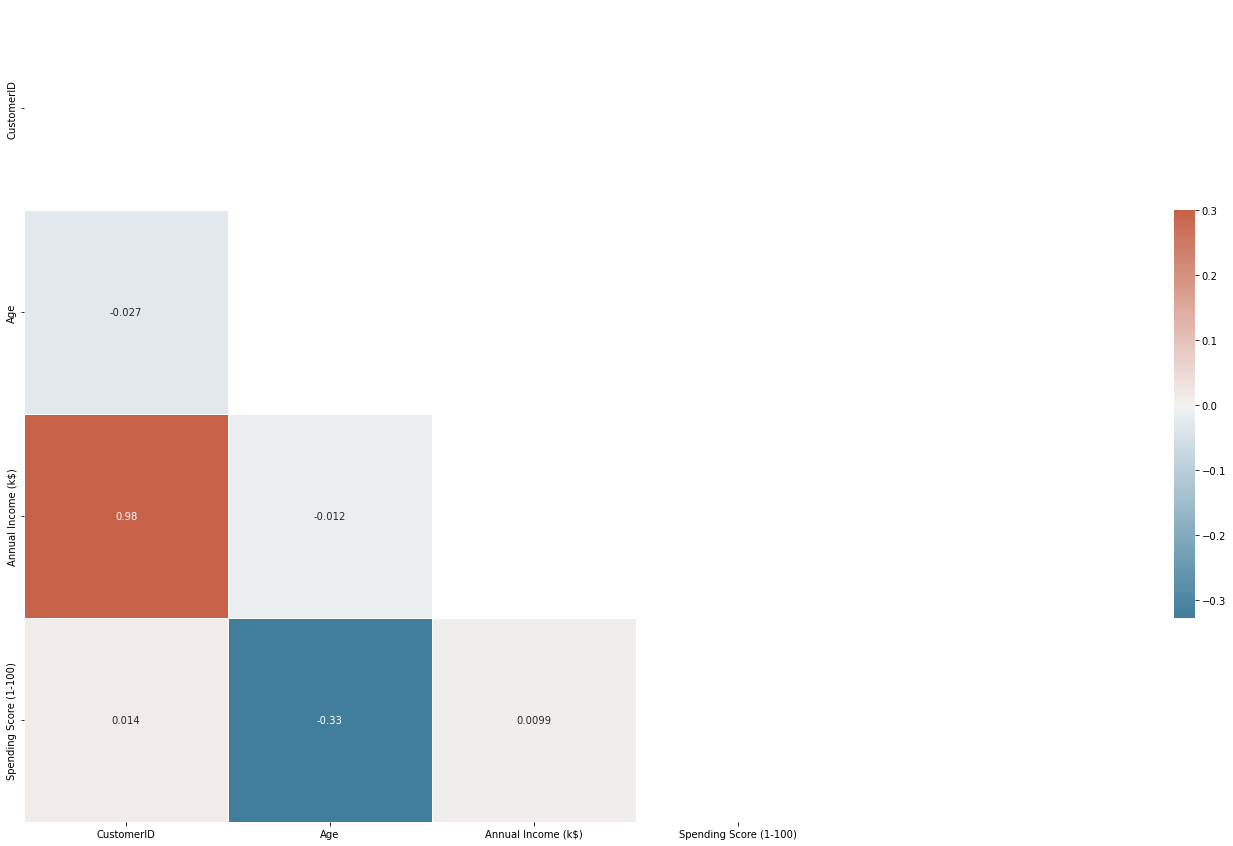

In [10]:
  corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(120, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

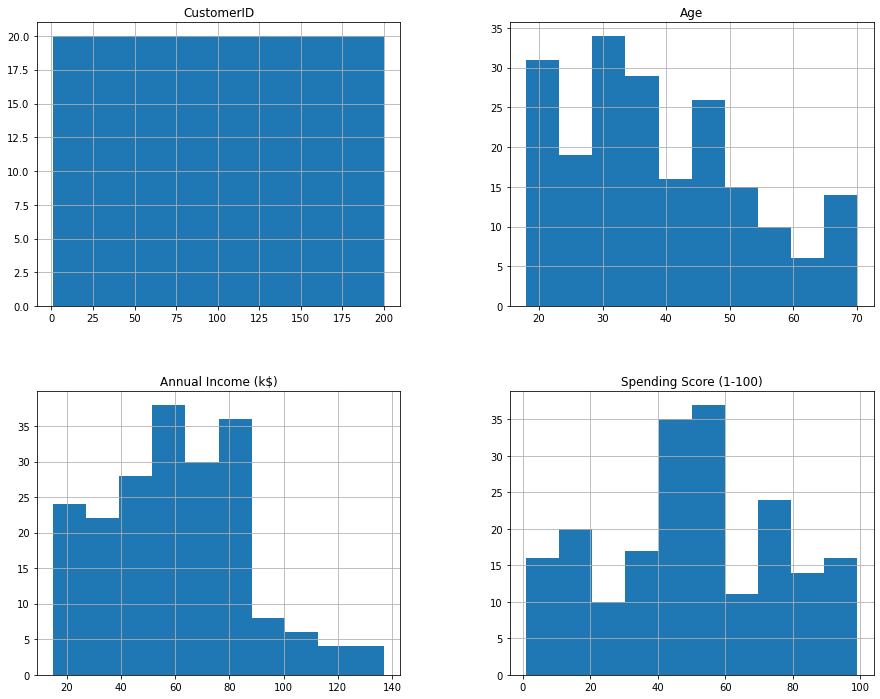

In [16]:
### hist plot
data.hist(figsize = (15, 12),grid = None)
plt.show()

In [12]:
new_df=data[['Genre', 'Age', 'Annual Income (k$)','Spending Score (1-100)']]
new_df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [13]:
new_df = pd.get_dummies(new_df, columns=['Genre'])
new_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,19,15,39,0,1
1,21,15,81,0,1
2,20,16,6,1,0
3,23,16,77,1,0
4,31,17,40,1,0
...,...,...,...,...,...
195,35,120,79,1,0
196,45,126,28,1,0
197,32,126,74,0,1
198,32,137,18,0,1


In [14]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.29298136996751367
For n_clusters = 3 The average silhouette_score is : 0.38366377184202277
For n_clusters = 4 The average silhouette_score is : 0.4051292479311983
For n_clusters = 5 The average silhouette_score is : 0.443849645338732
For n_clusters = 6 The average silhouette_score is : 0.45176811980591935
For n_clusters = 7 The average silhouette_score is : 0.4391760415655686
For n_clusters = 8 The average silhouette_score is : 0.42561947555340185
For n_clusters = 9 The average silhouette_score is : 0.4077264308766702
For n_clusters = 10 The average silhouette_score is : 0.3824438324500068
For n_clusters = 11 The average silhouette_score is : 0.3651673613568682
For n_clusters = 12 The average silhouette_score is : 0.3564180153160169
For n_clusters = 13 The average silhouette_score is : 0.33575362047589946
For n_clusters = 14 The average silhouette_score is : 0.3389934323870519
For n_clusters = 15 The average silhouette_score is : 0

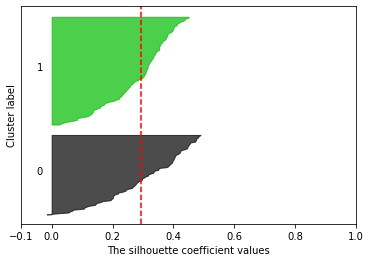

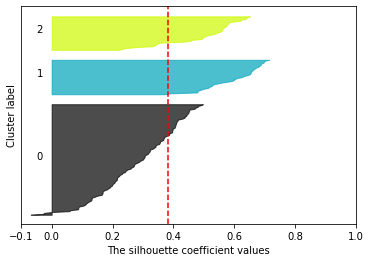

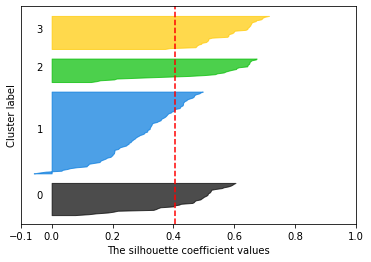

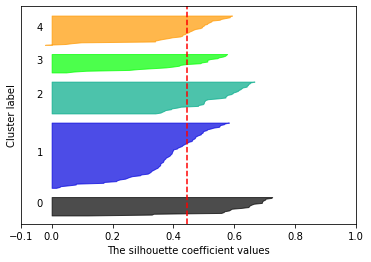

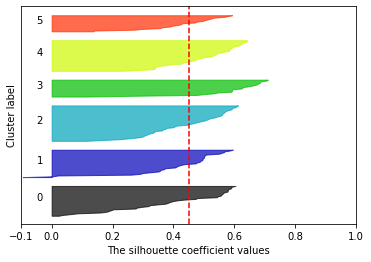

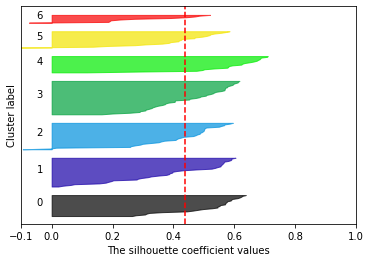

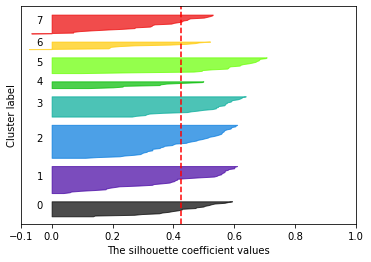

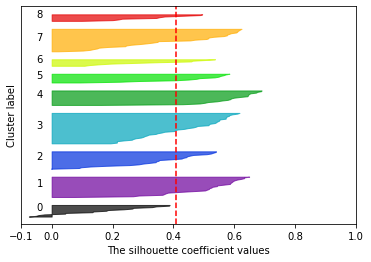

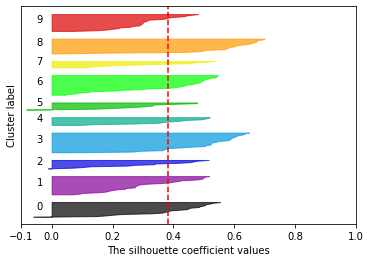

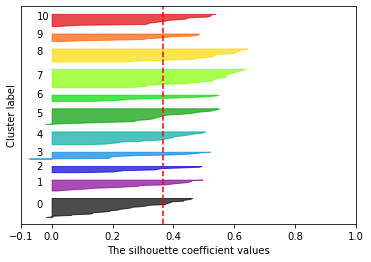

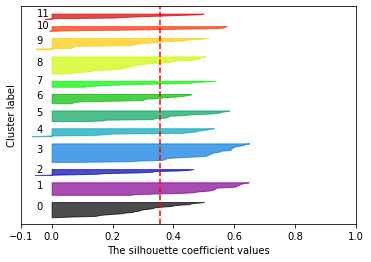

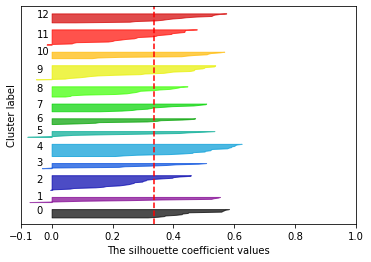

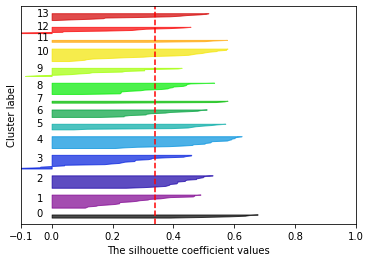

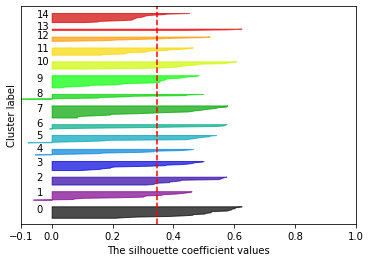

In [15]:
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(new_df) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(new_df)

    silhouette_avg = silhouette_score(new_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(new_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

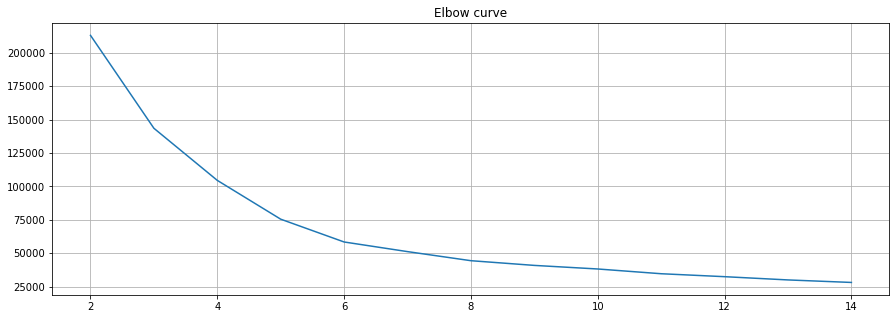

In [17]:
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(new_df)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.title('Elbow curve');

In [18]:
from sklearn.cluster import KMeans

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


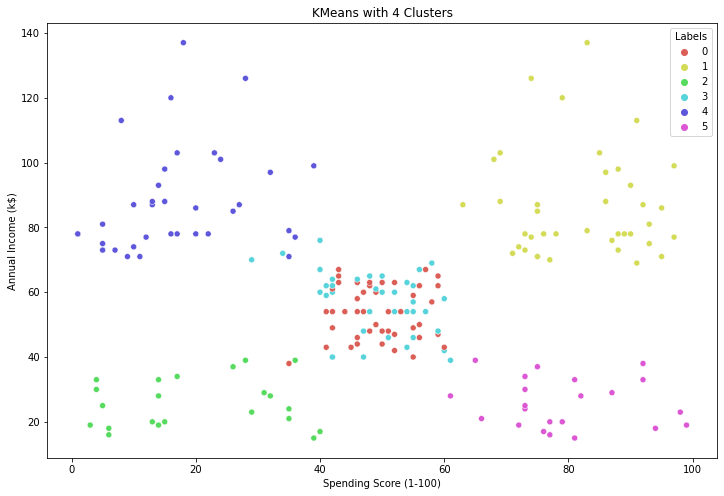

In [22]:
km5 = KMeans(n_clusters=6).fit(new_df)      #K=6

data['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Spending Score (1-100)'], new_df['Annual Income (k$)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans with 4 Clusters')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


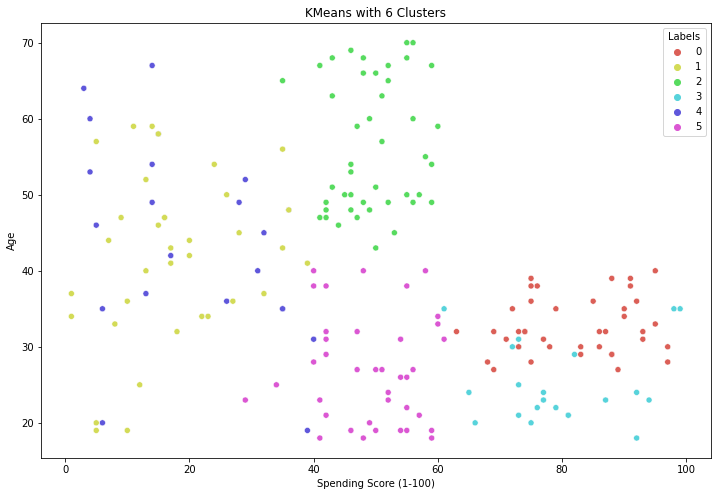

In [31]:
km5 = KMeans(n_clusters=6).fit(new_df)      #K=6

data['Labels'] = km5.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Spending Score (1-100)'], new_df['Age'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(km5.labels_).shape[0]))
plt.title('KMeans with 6 Clusters')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


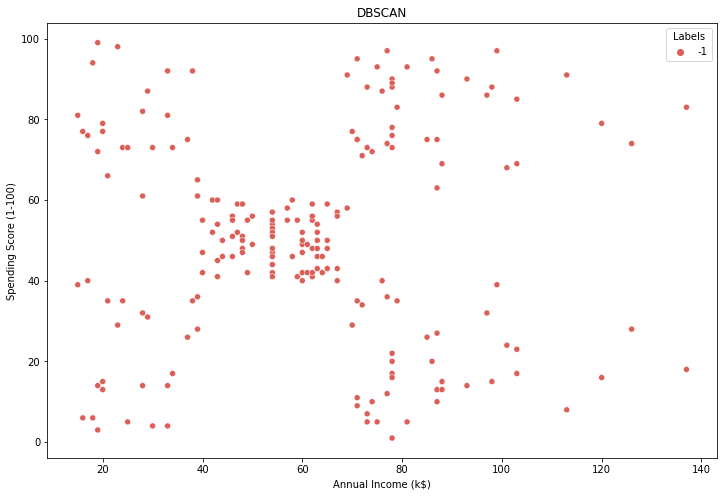

In [25]:
from sklearn.cluster import DBSCAN 

db = DBSCAN().fit(new_df)

data['Labels'] = db.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


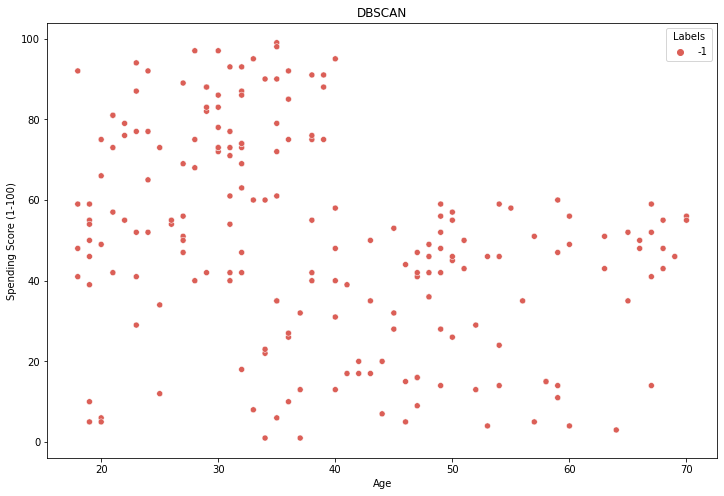

In [27]:
from sklearn.cluster import DBSCAN 

db = DBSCAN().fit(new_df)

data['Labels'] = db.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Age'], new_df['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN')
plt.show()

In [26]:
new_df

,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male,Labels
0,19,15,39,0,1,-1
1,21,15,81,0,1,-1
2,20,16,6,1,0,-1
3,23,16,77,1,0,-1
4,31,17,40,1,0,-1
...,...,...,...,...,...,...
195,35,120,79,1,0,-1
196,45,126,28,1,0,-1
197,32,126,74,0,1,-1
198,32,137,18,0,1,-1


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


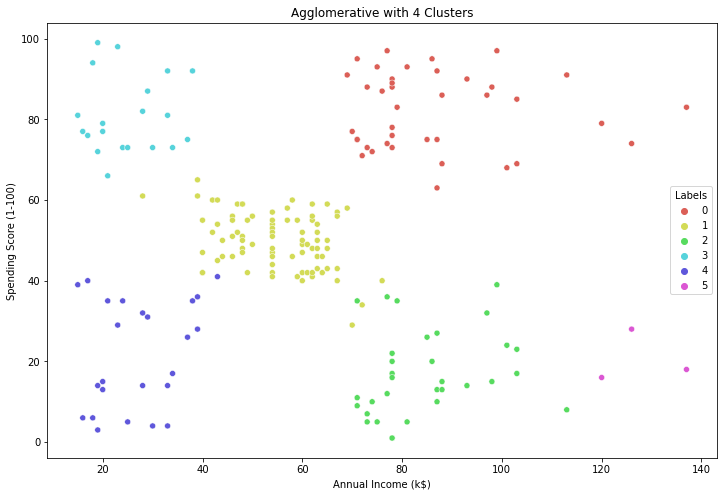

In [32]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(new_df)

data['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative with 4 Clusters')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


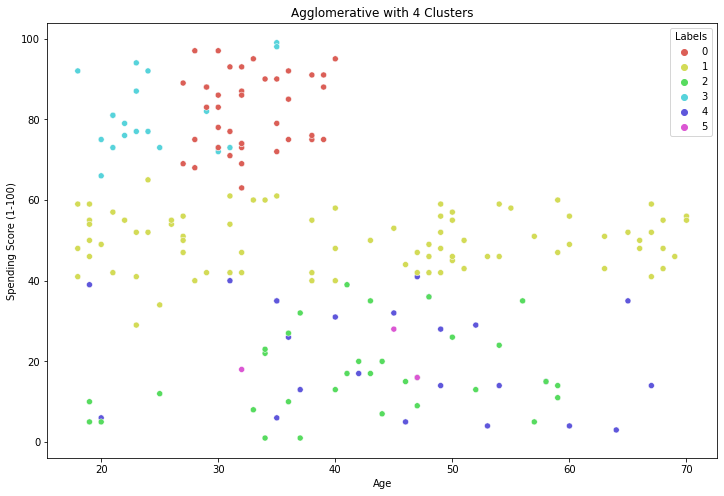

In [33]:
from sklearn.cluster import AgglomerativeClustering 

agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(new_df)

data['Labels'] = agglom.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Age'], new_df['Spending Score (1-100)'], hue=data['Labels'], 
                palette=sns.color_palette('hls', np.unique(agglom.labels_).shape[0]))
plt.title('Agglomerative with 6 Clusters')
plt.show()

In [35]:
!pip install hdbscan

  Using cached hdbscan-0.8.28.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build hdbscan


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [40 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-39\hdbscan
  copying hdbscan\__init__.py -> build\lib.win-amd64-cpython-39\hdbscan
  creating build\lib.win-amd64-cpython-39\hdbscan\tests
  copying hdbscan\tests\test_flat.py -> build\lib.win-amd64-cpython-39\hdbscan\tests
  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-39\hdbscan\tests
  copying 

In [36]:
import hdbscan

hdbscan_clus = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree=True)
hdbscan_clus.fit(data)
data['Labels'] = hdbscan_clus.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(new_df['Annual Income (k$)'], new_df['Spending Score (1-100)'], hue=data['Labels'], 
palette=sns.color_palette('hls', np.unique(hdbscan_clus.labels_).shape[0]))
plt.title('HDBSCAN with 6 Clusters')
plt.show()

ModuleNotFoundError: No module named 'hdbscan'

In [ ]:
           Project

                             On  

      Mall Customers Segmentation
